<a href="https://colab.research.google.com/github/faizansid77/ME766/blob/master/ME766A1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from math import cos, sin, sqrt, radians
from shapely.geometry import Point, Polygon

In [0]:
def retDH(th1, th2, l1, l2):
    DH = np.array([[0, 0, 0, th1],
                   [l1, 0, 0, th2], 
                   [l2, 0, 0, 0]])
    return DH

In [0]:
def T_iMin1_i(DH):
    [a, alfa, d, theta] = DH
    T = np.array([[cos(theta), -sin(theta), 0, a],
                  [sin(theta)*cos(alfa), cos(theta)*cos(alfa), -sin(alfa), -d*sin(alfa)],
                  [sin(theta)*cos(alfa), cos(theta)*sin(alfa), cos(alfa), d*cos(alfa)],
                  [0, 0, 0, 1]])
    return T

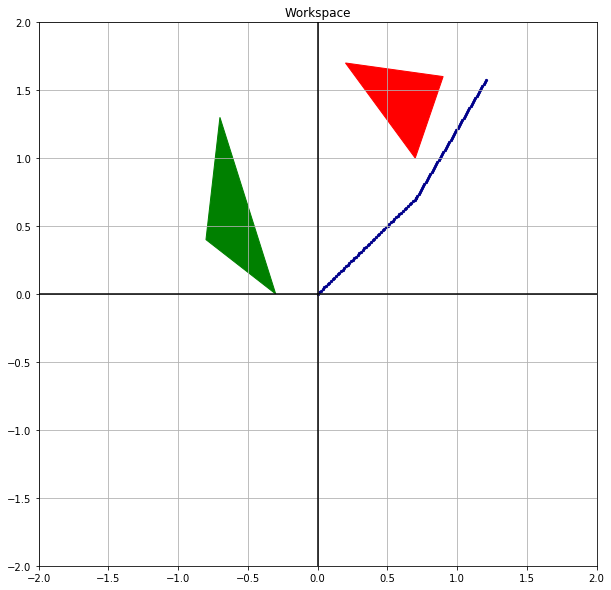

In [82]:
poly1 = Polygon([(0.7, 1), (0.2, 1.7), (0.9, 1.6)])
poly1x, poly1y = poly1.exterior.xy
poly2 = Polygon([(-0.3, 0), (-0.8, 0.4), (-0.7, 1.3)])
poly2x, poly2y = poly2.exterior.xy
arm1x = np.linspace(0, 1.0/sqrt(2), num=60)
arm1y = np.linspace(0, 1.0/sqrt(2), num=60)
arm2x = np.linspace(1.0/sqrt(2), 1.0/sqrt(2)+1.0/2.0, num=60)
arm2y = np.linspace(1.0/sqrt(2), 1.0/sqrt(2)+sqrt(3)/2.0, num=60)
fig1 = plt.figure(figsize=(10,10))
ax1 = fig1.add_subplot(111)
ax1.scatter(arm1x, arm1y, color='darkblue', s=5)
ax1.scatter(arm2x, arm2y, color='darkblue', s=5)
ax1.fill(poly1x, poly1y, color='red')
ax1.fill(poly2x, poly2y, color='green')
ax1.set(title='Workspace', xlim=(-2, 2), ylim=(-2, 2))
ax1.axvline(x=0, color='black')
ax1.axhline(y=0, color='black')
ax1.grid()
plt.show()

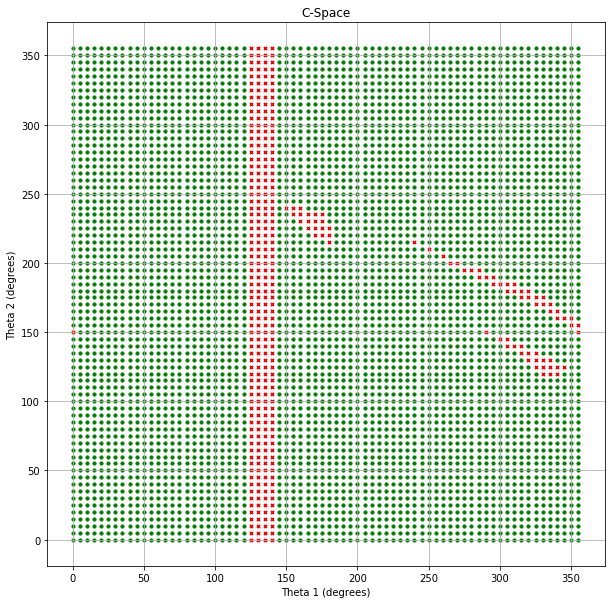

In [83]:
l1 = 1
l2 = 2
fig2 = plt.figure(figsize=(10,10))
ax2 = fig2.add_subplot(111)
for th1 in range(0, 360, 5):
    for th2 in range(0, 360, 5):
        DH = retDH(radians(th1), radians(th2), l1, l2)
        T_0_1 = T_iMin1_i(DH[0])
        T_1_2 = T_iMin1_i(DH[1])
        T_2_3 = T_iMin1_i(DH[2])
        T_0_2 = np.dot(T_0_1, T_1_2)
        T_0_3 = np.dot(T_0_2, T_2_3)
        p1 = Point(T_0_2[0][3], T_0_2[1][3])
        p2 = Point(T_0_3[0][3], T_0_3[1][3])
        x1 = np.linspace(0, p1.x, num=60)
        y1 = np.linspace(0, p1.y, num=60)
        x2 = np.linspace(p1.x, p2.x, num=60)
        y2 = np.linspace(p1.y, p2.y, num=60)
        if (not p1.within(poly1)) and (not p1.within(poly2)) and (not p2.within(poly1)) and (not p2.within(poly2)):
            ax2.scatter(th1, th2, s=10, color='green', marker='o')
        else:
            ax2.scatter(th1, th2, s=10, color='red', marker='x')
ax2.set(title='C-Space', xlabel='Theta 1 (degrees)', ylabel='Theta 2 (degrees)')
ax2.grid()
plt.show()

In [0]:
ysdwg